# Aula 2: Selecionando Métodos e Ajustando Modelos

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
http://conteudo.icmc.usp.br/pessoas/francisco <br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2022.

<hr>

Nessa aula vamos aprender a ajustar modelos e verificar quando ocorre overfitting. Vamos fazer o ajuste de um conjunto de pontos a partir de um polinômio, usando um método de regressão linear, que veremos em detalhes nas próximas aulas.

Vamos gerar os dados a partir uma função definida:

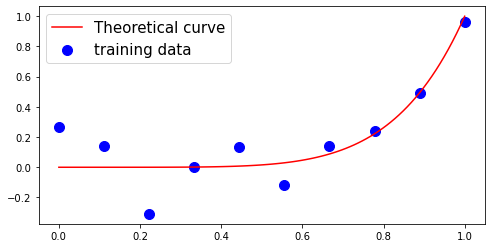

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

#função para gerar os dados
def function(x):
    y = x ** 6
    #y = np.sin(2 * np.pi * x)
    #y = np.cos(2 * np.pi * x)
    #y = x**4 + x**9
    return y

# training set
N_train = 10
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

#Marca os pontos
fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Curva teorica
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

Os dados que temos acesso são os pontos em azul. A curva em vermelho é desconhecida, mas a mostramos para entender como os dados são gerados.

Vamos fazer o ajuste usando um polinômio de grau $M$. 
$$
f(x,\theta) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_M x^M
$$
Inicialmente, vamos considerar $M=1$, ou seja, um ajuste linear.
$$
f(x,\theta) = \theta_0 + \theta_1 x 
$$

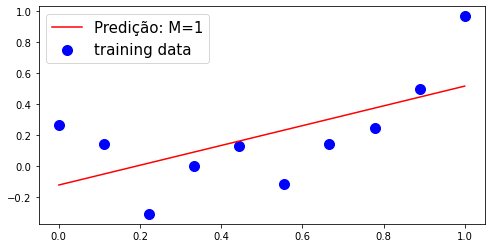

In [2]:
from sklearn import linear_model

# usa regressão linear para ajustar o modelo
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# preve os valores de y a partir de x
xplot=np.linspace(0,1,200)
xplot=xplot.reshape(len(xplot), 1)
Y_pred = model.predict(xplot)

# mostra os resultados
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=1', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

Notamos que, nesse caso, o ajuste é muito ruim, pois os dados foram gerados a partir de uma função não-linear.

Vamos fazer o ajuste usando um polinômio de grau $M=3$. 
$$
f(x,\theta) = \theta_0 + \theta_1 x + \theta_2 x^2 +  \theta_3 x^3 
$$
Veja sobre a função para gerar o polinômio no link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Define a matriz de atributos
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train) 
print('X^0             X^1          Xˆ2         Xˆ3')
print(X)

model = linear_model.LinearRegression()
model.fit(X,y_train)
# graficamos a curva obtida a partir da predição
Xplot=poly3.fit_transform(xplot)


X^0             X^1          Xˆ2         Xˆ3
[[1.         0.         0.         0.        ]
 [1.         0.11111111 0.01234568 0.00137174]
 [1.         0.22222222 0.04938272 0.01097394]
 [1.         0.33333333 0.11111111 0.03703704]
 [1.         0.44444444 0.19753086 0.0877915 ]
 [1.         0.55555556 0.30864198 0.17146776]
 [1.         0.66666667 0.44444444 0.2962963 ]
 [1.         0.77777778 0.60493827 0.47050754]
 [1.         0.88888889 0.79012346 0.70233196]
 [1.         1.         1.         1.        ]]


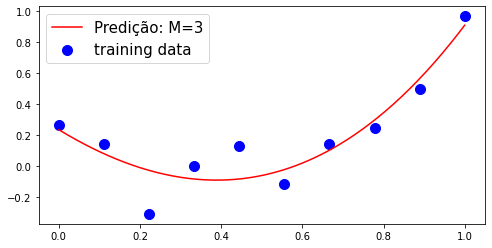

In [4]:
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=3', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

Nesse caso, o ajuste reproduz melhor a tendência observada nos dados.

Vamos verificar para um polinômio de grau $M=9$.
$$
f(x,\theta) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_9 x^9
$$


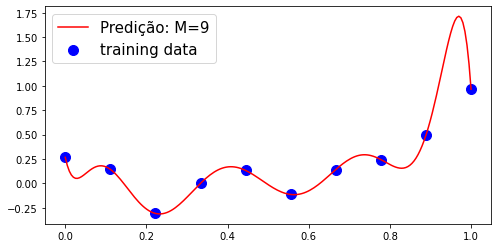

In [5]:
poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X,y_train)

Xplot=poly9.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=9', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

Para um polinômio de grau $M=9$, a curva se ajusta a todos os pontos. Em princícipio, esse parece ser o melhor ajuste.

O ajuste foi feito no conjunto de treinamento. Precisamos agora analisar a capacidade de generalização do modelo. Para isso, vamos fazer a previsão em novos dados, ou seja, no conjunto de teste.

Vamos analisar o erro na predição em função do grau do polinômio. O erro é calculando quando consideramos o conjunto de treinamento e teste, onde obtemos duas curvas distintas.

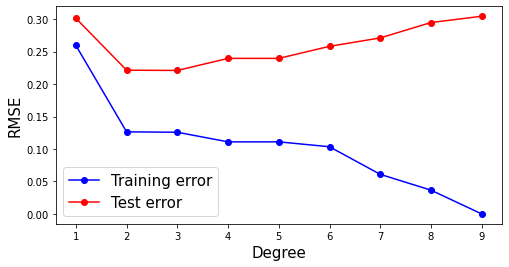

In [7]:
#Funcao para calcular o erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio

menor_erro = 0
menor_erro_grau = 1

for M in np.arange(1,10):
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
    
    if M == 1:
        menor_erro = error_test

    if error_test < menor_erro:
        menor_erro = error_test
        menor_erro_grau = M
    
    
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)


Melhor grau:  3


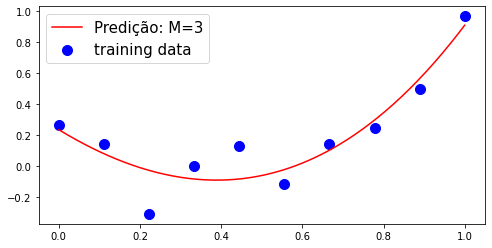

In [8]:
print('Melhor grau: ', menor_erro_grau)

poly_M = PolynomialFeatures(degree=menor_erro_grau)
X = poly_M.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X,y_train)

Xplot=poly_M.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=' + str(menor_erro_grau), color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

Notem que o erro na predição, quando usamos o conjunto de teste, tende a aumentar quando aumentamos o grau do polinômio, ou seja, quando aumentamos a complexidade do modelo. Essa é uma indicação de overfitting (veja material da aula teórica). Overfitting ocorre quando há um aumento no erro calculado no conjunto de teste. Notem que o erro no conjunto de treinamento vai a zero quando aumentamos o grau do polinômio. Nesse caso, a curva se ajusta a todos os pontos, como vimos anteriormente para $M = 9$.

Se aumentarmos o número de elementos no conjunto de treinamento, reduzimos o overfitting. Ou seja, precisamos balancear a complexidade do modelo de acordo com o volume de dados disponíveis. Vamos gerar os dados como anteriormente, mas com mais pontos.

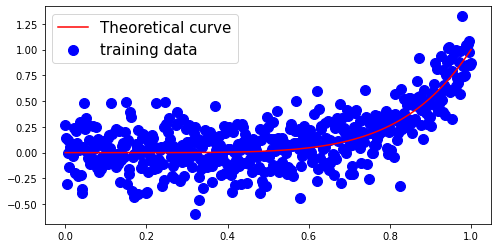

In [29]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

# training set
N_train = 500
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)



Para um polinômio de grau $M=9$, vemos que com mais pontos, overfitting deixa de ocorrer.

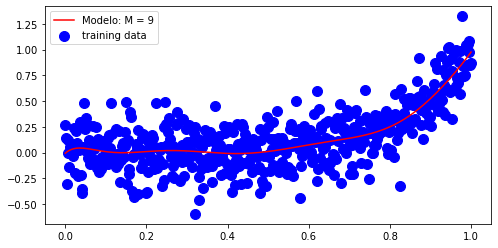

In [30]:
# test set
N_test = 100
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

fig = plt.figure(figsize=(8, 4))

poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
clf9 = linear_model.LinearRegression()
clf9.fit(X,y_train)

Xplot=poly9.fit_transform(xplot)
Y_pred = clf9.predict(Xplot)
plt.plot(xplot, Y_pred, '-r',  label='Modelo: M = 9')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")
plt.legend()
plt.show(True)

Além disso, podemos até usar polinômios de grau maior. Analisando o erro em função do grau do polinômio, vemos que ocorre overfitting apenas para polinômios de grau muito alto.

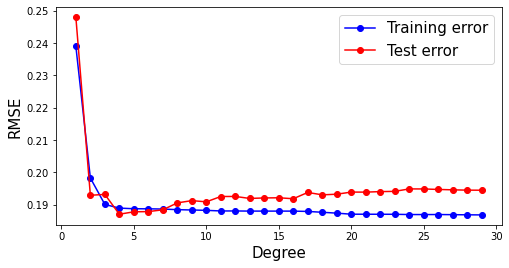

In [31]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []
degree = []
for M in np.arange(1,30):    
    poly = PolynomialFeatures(degree=M)
    X_train = poly.fit_transform(x_train)
    clf = linear_model.LinearRegression()
    clf.fit(X_train,y_train)
    Y_pred = clf.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)
    
    X_test=poly.fit_transform(x_test)
    Y_pred2 = clf.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

Ou seja, quanto mais dados estiverem disponíveis, maior pode ser a complexidade do modelo. Temos que ter uma balanço entre complexidade do modelo e dados disponíveis.

## Validação cruzada

O método de validação cruzada é usado na escolha do modelo. Além disso, podemos usar o método para escolher o melhor conjunto de parâmetros de um classificador ou regressor. Notem que os dados são divididos em dois conjuntos, um de teste e outro de treinamento. Aplicamos validação cruzada ao conjunto de treinamento, para posterior avaliação do modelo no conjunto de teste.
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">


Vamos considerar os dados da flor iris.

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

Selecionamos os conjuntos de treinamento e teste.

In [33]:
from sklearn.model_selection import train_test_split

p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

Vamos usar validação cruzada para encontrar o melhor número de vizinhos. Basicamente, no algoritmo k-vizinhos nós classificamos de acordo com a distância:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/440px-KnnClassification.svg.png">

k: 1 Average accurace: 0.9333333333333332
k: 2 Average accurace: 0.925
k: 3 Average accurace: 0.9416666666666667
k: 4 Average accurace: 0.9416666666666667
k: 5 Average accurace: 0.95
k: 6 Average accurace: 0.9666666666666666
k: 7 Average accurace: 0.975
k: 8 Average accurace: 0.9666666666666666
k: 9 Average accurace: 0.975
k: 10 Average accurace: 0.95
k: 11 Average accurace: 0.95
k: 12 Average accurace: 0.9583333333333333
k: 13 Average accurace: 0.9583333333333333
k: 14 Average accurace: 0.9583333333333333
k: 15 Average accurace: 0.9666666666666666
k: 16 Average accurace: 0.9583333333333333
k: 17 Average accurace: 0.95
k: 18 Average accurace: 0.9583333333333333
k: 19 Average accurace: 0.9416666666666667
Melhor k: 7


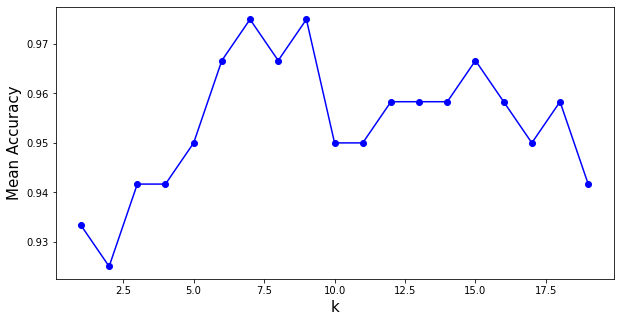

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 10 #number of folds
vk = []
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    print('k:', k, 'Average accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(k)

best_k = np.argmax(vscore)+1 # the index of the vector starts in zero
print('Melhor k:', best_k)
plt.figure(figsize=(10,5))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Mean Accuracy', fontsize = 15)
plt.show()

Vamos usar o melhor valor de k para classificar os dados de teste.

In [35]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 1.0


Vamos repetir a classificação para a base de dados de câncer de mama.

In [46]:
import random
random.seed(1)
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt

# CSV file
data = pd.read_csv('data/iris.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
print(data.shape)
data.head(25)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Convertemos para o formato de arrays do numpy para facilitar o acesso aos dados.

In [47]:
data = data.to_numpy()
#data = data.values
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Selecionamos os conjuntos de teste e treinamento.

In [48]:
from sklearn.model_selection import train_test_split

p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

Vamos fazer a validação cruzada.

k: 2 Accuracy: 0.9333333333333333
k: 3 Accuracy: 0.95
k: 4 Accuracy: 0.9416666666666668
k: 5 Accuracy: 0.9583333333333333
k: 6 Accuracy: 0.9583333333333334
k: 7 Accuracy: 0.95
k: 8 Accuracy: 0.9583333333333334
k: 9 Accuracy: 0.9666666666666666
k: 10 Accuracy: 0.95
k: 11 Accuracy: 0.9583333333333333
k: 12 Accuracy: 0.9583333333333333
k: 13 Accuracy: 0.9583333333333333
k: 14 Accuracy: 0.9583333333333333
k: 15 Accuracy: 0.9583333333333333
k: 16 Accuracy: 0.9583333333333333
k: 17 Accuracy: 0.9666666666666666
k: 18 Accuracy: 0.9499999999999998
k: 19 Accuracy: 0.9666666666666666
Melhor k: 8


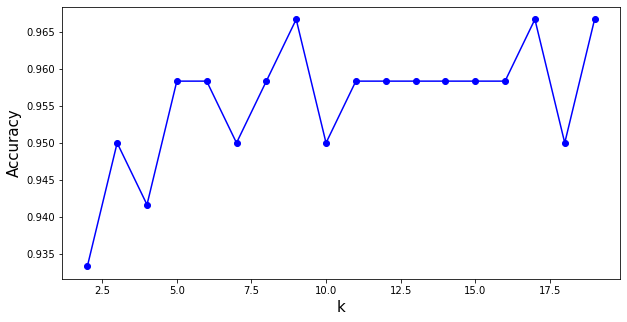

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

nkf = 10 #number of folds
vk = []
vscore = []
for k in range(2, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    print('k:', k, 'Accuracy:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(k)

best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)
plt.figure(figsize=(10,5))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

Aplicando ao conjunto de teste, podemos agora realizara classificação, usando todo o conjunto de treinamento na classificação.

In [50]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.9666666666666667


### Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 - Troque a função seno por $x^6$ nos exemplos acima e realize a mesma análise apresentada nessa aula.

2 - Verifique como a acurácia muda em função do número de grupos k na validação cruzada, conforme feito acima, para a base de dados Vehicle.

3 - Varie o número de folds para a base iris, de 2 até 20 e verifique se essa escolha influencia na classificação.